# Datathon

In [1]:
import pandas as pd

In [2]:
rejected = pd.read_csv("Lending_Club_Rejected_2014_2018.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Lending_Club_Rejected_2014_2018.csv'

In [ ]:
accepted = pd.read_csv("Lending_Club_Accepted_2014_2018.csv")

/var/folders/bh/b7l9xs7133g2k2ztkrf8jywr0000gn/T/ipykernel_44622/2282768605.py:1: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted = pd.read_csv("Lending_Club_Accepted_2014_2018.csv")


In [ ]:
print(rejected.keys())
print(accepted.keys())

Index(['Amount_Requested', 'Application_Date', 'Loan_Title', 'Risk_Score',
       'Debt_to_Income_Ratio', 'Zip_Code', 'State', 'Employment_Length',
       'Policy_Code'],
      dtype='object')
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)


In [ ]:
print(accepted['emp_length'].unique())

['10+ years' '3 years' '4 years' '6 years' '1 year' '7 years' '8 years'
 '5 years' '2 years' '9 years' '< 1 year' nan]


In [ ]:
def trim_accept(accept):
    cols = ['loan_amnt', 'title','dti','zip_code','addr_state','emp_length','policy_code', 'issue_d']
    trimmed_acp = accept[cols]
    return trimmed_acp 

def trim_rej(rej):
    return rej[["Amount_Requested", "Loan_Title", "Debt_to_Income_Ratio", "Zip_Code", "State", "Employment_Length", "Policy_Code", 'Application_Date']]

In [ ]:
rejected_dropna = pd.DataFrame(trim_rej(rejected).dropna())
# print(rejected_dropna.shape)

In [ ]:
accepted_dropna = pd.DataFrame(trim_accept(accepted).dropna())
# print(accepted_dropna.shape)

In [ ]:

def unifyDate(accepted_dropna, rejected_dropna):
    '''Only keep the samples from 2016/4 to 2016/12 and unify the data format to be one integer representing the month'''
    monthNameToInt = {
        "Jan": 1,
        "Feb": 2,
        "Mar": 3,
        "Apr": 4,
        "May": 5,
        "Jun": 6,
        "Jul": 7,
        "Aug": 8,
        "Sep": 9,
        "Oct": 10,
        "Nov": 11,
        "Dec": 12
    }
    
    ## Proccess accepted
    # filter to keep the 2016 year
    accepted_dropna = accepted_dropna[accepted_dropna['issue_d'].str.endswith('2016')]
    accepted_dropna['month'] = accepted_dropna['issue_d'].str[0:3].map(monthNameToInt)
    del accepted_dropna['issue_d']

    ## Process rejected
    rejected_dropna['month'] = rejected_dropna['Application_Date'].str[5:7].astype(int)
    del rejected_dropna['Application_Date']
    
    ## Final
    return (accepted_dropna, rejected_dropna)

accepted_dropna, rejected_dropna = unifyDate(accepted_dropna, rejected_dropna)
print(accepted_dropna)

/var/folders/bh/b7l9xs7133g2k2ztkrf8jywr0000gn/T/ipykernel_44622/4077895458.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_dropna['month'] = accepted_dropna['issue_d'].str[0:3].map(monthNameToInt)


         loan_amnt                    title    dti zip_code addr_state emp_length  policy_code  month
651660     10000.0       Debt consolidation  13.05    447xx         OH    3 years          1.0      6
651661     12000.0       Debt consolidation  22.86    774xx         TX    7 years          1.0      6
651662     20000.0  Credit card refinancing  17.05    960xx         CA    8 years          1.0      6
651663      4900.0         Home improvement   6.07    770xx         TX   < 1 year          1.0      6
651664     21000.0       Debt consolidation   9.87    913xx         CA   < 1 year          1.0      6
...            ...                      ...    ...      ...        ...        ...          ...    ...
2029945    16000.0         Medical expenses  12.25    284xx         NC  10+ years          1.0     10
2029946    24000.0  Credit card refinancing  10.98    967xx         HI    4 years          1.0     10
2029947    24000.0         Home improvement  19.61    356xx         AL    7 years 

In [ ]:
accepted_dropna.columns = ['Amount_Requested', 'Loan_Title', 'Debt_to_Income_Ratio', 'Zip_Code', 'State', 'Employment_Length', 'Policy_Code', 'month']

In [ ]:
accepted_dropna["Status"] = 1
rejected_dropna["Status"] = 0
rejected_dropna["Debt_to_Income_Ratio"] = rejected_dropna["Debt_to_Income_Ratio"].str.rstrip("%").astype("float") 
frames = [accepted_dropna,rejected_dropna]
merged = pd.concat(frames)

In [ ]:
merged.Employment_Length = merged.Employment_Length.str[:2]
merged.loc[ merged["Employment_Length"] == "< ", "Employment_Length"] = 0.1
merged["Employment_Length"] = merged["Employment_Length"].astype("float") 

In [ ]:
merged_copy = merged.copy()

In [ ]:
print(merged.keys())

Index(['Amount_Requested', 'Loan_Title', 'Debt_to_Income_Ratio', 'Zip_Code',
       'State', 'Employment_Length', 'Policy_Code', 'month', 'Status'],
      dtype='object')


In [ ]:
income_by_state = pd.read_csv("state_average_income_2016.csv")
states = income_by_state[income_by_state.columns[0]].to_numpy()
states = np.array(states)
income_by_state = income_by_state[0:51]
income_by_state = income_by_state[['state', 'income']]

incomes = income_by_state[income_by_state.columns[1]].to_numpy()
income_by_state_dict = dict(zip(states, incomes))
def modify_state(state):
    income_by_state_dict[state]

In [ ]:
merged_copy2 = merged_copy.copy()

In [ ]:
merged_copy2["State"] = merged_copy2["State"].map(income_by_state_dict).str.replace(',', "").astype(int)

In [ ]:
merged = merged_copy2
print(merged)

          Amount_Requested               Loan_Title  Debt_to_Income_Ratio Zip_Code  State  Employment_Length  Policy_Code  month  Status
651660             10000.0       Debt consolidation                 13.05    447xx  58232                3.0          1.0      6       1
651661             12000.0       Debt consolidation                 22.86    774xx  62720                7.0          1.0      6       1
651662             20000.0  Credit card refinancing                 17.05    960xx  71879                8.0          1.0      6       1
651663              4900.0         Home improvement                  6.07    770xx  62720                0.1          1.0      6       1
651664             21000.0       Debt consolidation                  9.87    913xx  71879                0.1          1.0      6       1
...                    ...                      ...                   ...      ...    ...                ...          ...    ...     ...
26132303           10000.0       Debt con

In [ ]:
merged = merged.sample(frac=1).reset_index(drop=True)
# display the dataFrame without line breaks
pd.set_option('display.expand_frame_repr', False)

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')


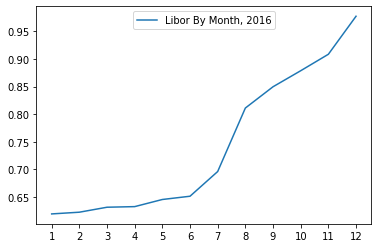

In [ ]:
from matplotlib import pyplot as plt
libor = pd.read_csv('libor.csv')
print(libor.keys())
month = list(libor.columns)
index = list(libor.iloc[0])

plt.plot(month,index, label="Libor By Month, 2016")
leg = plt.legend(loc='upper center')
plt.show()

In [ ]:
monthly_para = []
monthly_accur = {}

### Import scikit learn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

for m in range (4,13):
    #select the corresponding month in libor and merge
    month_merge = merged.loc[merged['month'] == m]
    numerical_features = ["Amount_Requested", "Debt_to_Income_Ratio", "Employment_Length", "Policy_Code", "State"]
    X = month_merge[numerical_features]
    y = month_merge["Status"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Build Classifier
    logreg = LogisticRegression(max_iter=1000000)
    LogRegClassifier = logreg.fit(X_train, y_train)

    # Visualize weights
    coef = LogRegClassifier.coef_[0]
    monthly_para.append(list(coef))

    # Test Accuracy
    y_hat = LogRegClassifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_hat, y_hat)
    monthly_accur[m] = accuracy

print(monthly_para)
print(monthly_accur)

# find the parameter that has the highest correlation with
import numpy as np

[[-2.669342446323074e-06, -0.016465050148749424, 0.46600384334157435, 0.09029093402639263, -7.90603669028709e-05], [-3.5895478618395334e-07, -0.01601208543943413, 0.4738240682215595, 0.09129448888855239, -8.504445431416626e-05], [-2.1935221897207754e-05, -0.05373836212650808, 0.2643959475396851, 5.321672218356968, -7.187352550854232e-05], [-1.823363347585075e-05, -0.032270347970694294, 0.2872416942691222, 4.521738128062798, -7.735212487698688e-05], [-1.7783542906873218e-05, -0.041903405795191626, 0.29473695621823903, 4.58702550645115, -7.504010280118053e-05], [-2.1873221340525263e-05, -0.036870564116249865, 0.3260311462497045, 4.1595304821698305, -7.739337071430906e-05], [-3.105349873481565e-06, -0.021837925167766323, 0.4790805214772353, 0.0886764087406552, -8.063358142682437e-05], [3.6559832471490565e-07, -0.021159430695340632, 0.47810758800829134, 0.08731977090610031, -8.030019223373285e-05], [3.581734649438817e-06, -0.018901715131510836, 0.4738928862994289, 0.09141295304598897, -8.0

In [ ]:
monthly_params = np.array(monthly_para)
#print(monthly_params)
print('------')

index = list(libor.iloc[0])
index = index[3:]
index = np.array(index)

all_params_by_month = []
for col in range(5):
    # the weights of one feature from all months
    param_by_month = np.array(monthly_params[:, col])
    R = np.corrcoef(param_by_month, index)
    print(R[0, 1])

------
0.314855950557641
0.19107061252524427
0.31328120214582894
-0.2726458010016944
-0.18370957322852507


## sy.ipynb

In [ ]:
libor = pd.read_csv("LIBOR14to18.csv")

In [ ]:
def modify_date(input_date):
    input_year = input_date[-4:]
    input_month = input_date[0:3]
    month_dict = {"Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05", 
    "Jun": "06", "Jul": "07", "Aug": "08", "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"}
    month = month_dict[input_month]
    return input_year + month

trimmed = accepted[["int_rate", "issue_d"]]
trimmed.issue_d = trimmed["issue_d"].apply(modify_date)
trimmed.sort_values(by=['issue_d'])
int_rate_monthly = trimmed.groupby(by=['issue_d']).mean()
print(int_rate_monthly)

In [ ]:
import numpy as np
x = libor[libor.columns[1]].to_numpy()
print(x)
# x = libor[["int_rate"]].to_numpy()
y = int_rate_monthly[int_rate_monthly.columns[0]].to_numpy()
print(y)
corr = np.corrcoef(x[48:60], y[48:60])
print(corr)

## Using Logistic Regression for Numerical Features

In [ ]:
### Extract all the numerical features(columns)
numerical_features = ["Amount_Requested", "Debt_to_Income_Ratio", "Employment_Length", "Policy_Code"]

X = merged[numerical_features]
y = merged["Status"]

print(X.shape)
print(y.shape)

(27069691, 4)
(27069691,)


In [ ]:
### Import scikit learn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [ ]:
### Data exploration
print(merged["Status"].value_counts())
print("y=1 samples takes the porportion of", 1871838 / (25197853 + 1871838))

0    25197853
1     1871838
Name: Status, dtype: int64
y=1 samples takes the porportion of 0.06914884990744814


In [ ]:
def LinearRegressionTrainAndTest(X, y):
    '''Prints the weights and the accuracy of the model'''
    # Split train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Build Classifier
    logreg = LogisticRegression(max_iter=1000000)
    LogRegClassifier = logreg.fit(X_train, y_train)

    # Visualize weights
    coef = LogRegClassifier.coef_[0]
    print(coef)

    # Test Accuracy
    y_hat = LogRegClassifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_hat, y_hat)
    print(accuracy)

#### Result
Data | State | Weights | Accuracy
| --- | --- | --- | --- |
First 1000 samples | converged | [-3.86427605e-06 -7.79187122e-03  2.72544483e-01  4.93654007e+00] |
First 100000 samples | converged | [-1.82404211e-05 -1.88134360e-02  2.03956568e-01  7.15292616e+00] | 
First 1000000 samples | converged | [-2.71159981e-05 -1.78985938e-02  2.21481719e-01  7.37541925e+00] | 
Full data set | converged | [-2.21539709e-05 -1.73101075e-02  2.18396270e-01  7.38836630e+00] | 0.9969306387906377
 